# __Zomato's Data of Restaurants__

## __Problem Statement's__

### 1. Do a greater number of restaurants provide online delivery as opposed to offline services?
### 2. Which types of restaurants are the most favored by the general public?
### 3. What price range is preferred by couples for their dinner at restaurants?

#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data stored in local drive

In [2]:
data = pd.read_csv(r"D:\Data Analysis\5 Project\3. Python_Pandas\Project_2_Zomato\zomato_data.csv")

data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


#### As we can see in the avobe output, 'rate' column has denominator. We need to remove denominator for analysis.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


####  lets convert 'rate' column to float and remove denominator using function.

In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
    
data['rate']=data['rate'].apply(handleRate)

data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


#### To check if there are any null values.

In [5]:
data.count()

name                           148
online_order                   148
book_table                     148
rate                           148
votes                          148
approx_cost(for two people)    148
listed_in(type)                148
dtype: int64

#

#### Let's Explore listed_in(type) column

Text(0.5, 0, 'Type of Restaurant')

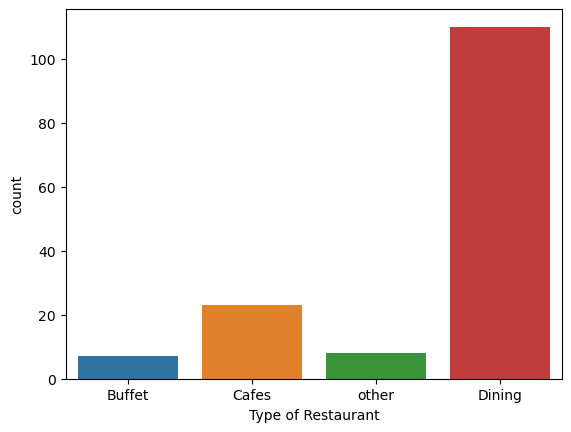

In [6]:
sns.countplot(x = data['listed_in(type)'])
plt.xlabel('Type of Restaurant')


#### Majority of restaurants fall's in dining category

#

Text(0, 0.5, 'No of Votes')

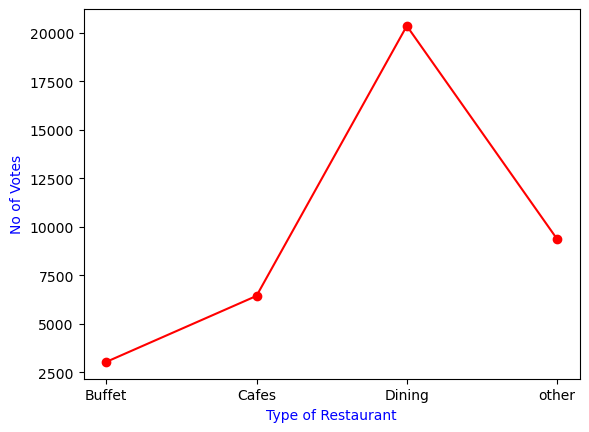

In [7]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='red',marker='o')
plt.xlabel('Type of Restaurant',c='blue')
plt.ylabel('No of Votes', c='blue')

#### People Prefer Dining type of restaurant more

#

In [8]:
data.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


In [17]:
max_votes = data['votes'].max()
restaurant_with_max_votes = data.loc[data['votes'] == max_votes, 'name']

print('No of Votes:')
print(max_votes)
print('Restaurant with Max Votes:')
print(restaurant_with_max_votes)

No of Votes:
4884
Restaurant with Max Votes:
38    Empire Restaurant
Name: name, dtype: object


#### Maximum voted Restaurant by people

#

#### Let's Explore online_order column

<Axes: xlabel='online_order', ylabel='count'>

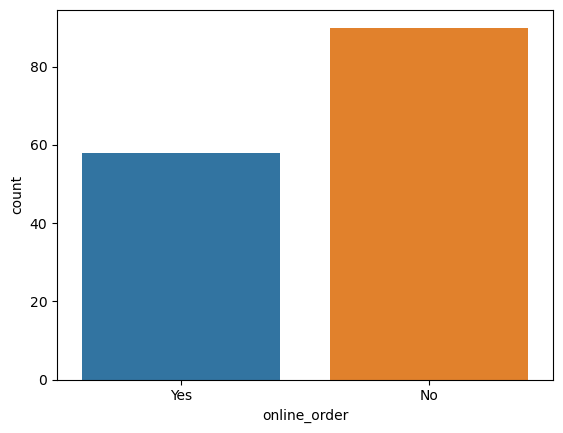

In [20]:
sns.countplot(x = data['online_order'])

#### This suggests majority restaurant do not accept online orders.

#

#### Let's explore rate column

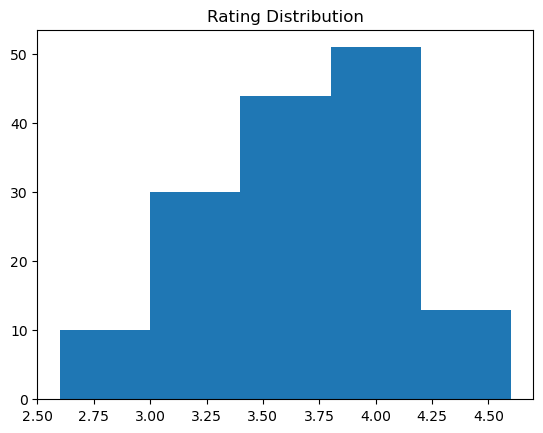

In [23]:
plt.hist(data['rate'],bins = 5)
plt.title('Rating Distribution')
plt.show()

#### Majority restaurants received rating from 3.5 to 4.

#

#### Let's explore approx_cost(for two people)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

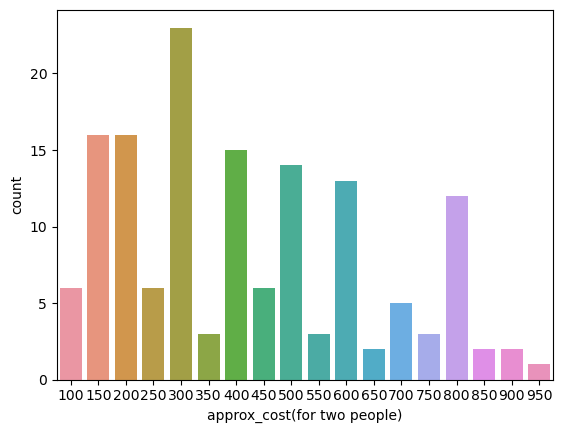

In [26]:
couple_data = data['approx_cost(for two people)']
sns.countplot(x=couple_data)

#### Majority of couples prefer restaurants with an approximate cost of 300 rupees.

#

#### Now we will examine whether online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

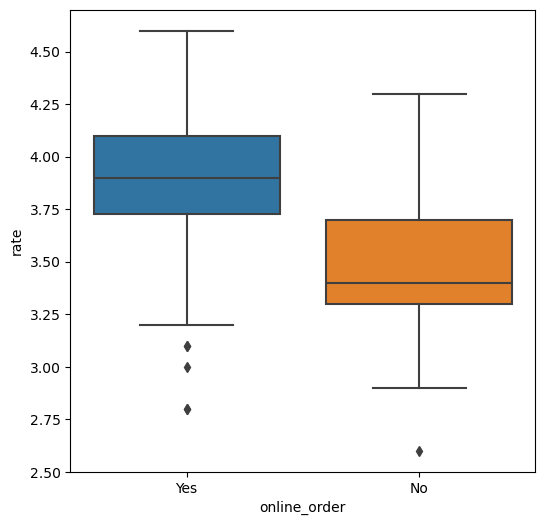

In [32]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data =data)

#### Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

#

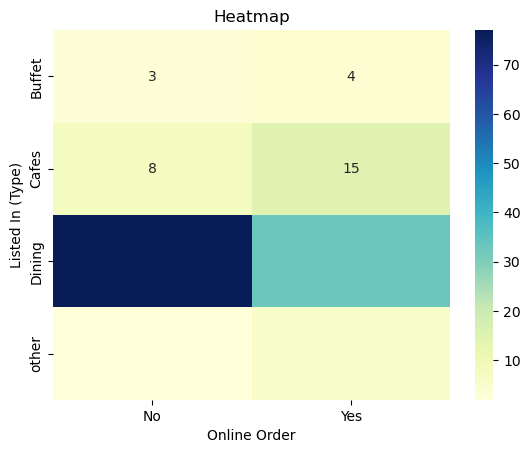

In [34]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()